# Exercises for using Matplotlib

## Exercise 1: Visualise the points as scatter plots and show the regression line

### Preparation for Exercise 1

#### 1) Loading Data from a JSON file

In [1]:
# Load json module
import json

# Create a file open context manager and load dict from JSON
json_path = '../Data/exercise/anscombe.json'
with open(json_path, 'r') as fobj:
    data_dict = json.load(fobj)

# Print the data using the items method of the dict
for key, value in data_dict.items():
    print(key)
    print(value)

dataset1
{'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]}
dataset2
{'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]}
dataset3
{'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]}
dataset4
{'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8], 'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}


#### 2) Using np.polyfit to generate a linear fit
A linear fit is a polynomial of grade 1

In [2]:
# Import matplotlib and NumPy
import matplotlib.pyplot as plt
import numpy as np

# Get the first dataset, then get its x and y value
dataset = data_dict['dataset1']
x = dataset['x']
y = dataset['y']

# Do the polynomial fit
fit = np.polyfit(x, y, 1)
print(f'for y = mx + b, m={fit[0]}, b={fit[1]}')

# Also get the sum of squared residuals
fit, sum_sq_res, *_ = np.polyfit(x, y, 1, full=True)
sum_sq_res

for y = mx + b, m=0.5000909090909094, b=3.000090909090908


array([13.76269])

### **Task** for Exercise 1:
We can use [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) for a simple linear regression. Use this to visualise and fit [Anscombe's quartett](https://www.jstor.org/stable/2682899?seq=4) (compare your results with figures 1-4 in the article) using the data located in `exercise_data/anscombe.json`.

Visualise the points as scatter plots and show the regression line. Give labels to the axes and try to vary the colors of the individual components. If you want, you can also create a separate plot for the fitting statistics. For the reference about the plot types in Matplotlib (including scatter plots) look [here](https://matplotlib.org/stable/plot_types/index.html).

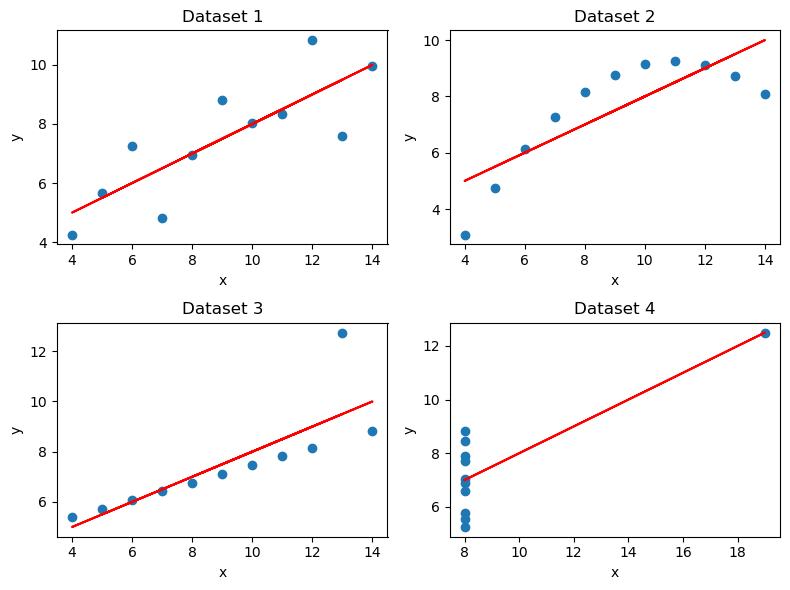

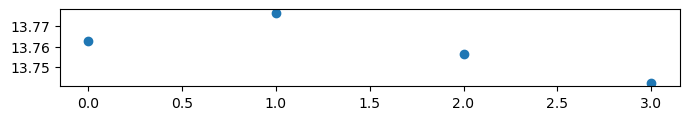

In [3]:
# Your solution here

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 1))

for i, ax in enumerate(axs.flat):
    data = data_dict[f'dataset{i+1}']
    x = np.array(data['x'])
    y = np.array(data['y'])
    ax.scatter(x, y)
    ax.set_title(f'Dataset {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    x_fit, residuals, *_ = np.polyfit(x, y, 1, full=True)
    y_fit = np.polyval(x_fit, x)
    ax.plot(x, y_fit, color='red')
    ax2.scatter(i, residuals, color='C0')
fig.tight_layout()

## Exercise 2: Create your own style

### **Task 1**: Create a mock of graphs from your field

Create a selection of graphs using `np.linspace`, `np.random.rand` and the NumPy functions that are somewhat representative of a figure you might publish.

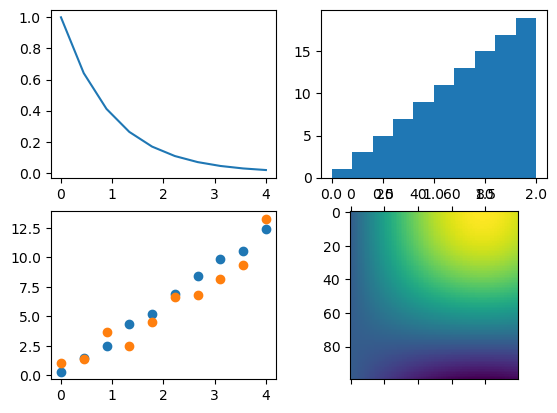

In [4]:
# Create data for x1 and y1 using 'np.linspace' and the numpy functions
x1 = np.linspace(0, 4, 10)
y1 = np.exp(-x1)

# Create data for x2 and y2 using 'np.linspace' and the numpy functions
x2 = np.linspace(0, 4, 100)
y2 = np.sqrt(x2)

# Create random data y3a and y3b from x1 using 'np.random.rand'
y3a = x1 * 3 + (np.random.rand(10) - 0.5)
y3b = x1 * 3 + 3 * (np.random.rand(10) - 0.5)

# Create meshgrid xx and yy and data zz
xx, yy = np.meshgrid(np.linspace(0, 2, 100,), np.linspace(0, 2, 100))
zz = np.sin(xx) * np.cos(yy)

# Create figure and axes
fig, axes = plt.subplots(2, 2)

# Plot data y1 on subplot(0,0), y2 on subplot(0,1), y3a and y3b on subplot(1,0), zz on subplot(1,1)
axes[0, 0].plot(x1, y1)
axes[0, 1].hist(y2)
axes[1, 0].scatter(x1, y3a)
axes[1, 0].scatter(x1, y3b)
axes[1, 1].matshow(zz)

### **Task 2**: Try to build a presentation style and a publication style that fits your needs

Available options can be found [here](https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc). 